In [1]:
import re             # regular expressions
import string         # string operations
import os             # access directories
import pandas as pd   # dataframes
from tqdm import tqdm # create progress bar (for i in tqdm(list))
tqdm.pandas()         # use progress_apply() instead of apply() for progress bar on pandas operations

os.chdir('../Data/UoE')

In [9]:
df = pd.read_json("UoE_staff_publications_theses_spaczz_matches.json")# unpickled_df

In [127]:
methods = [item for sublist in [m for m in df['methods'] if not m == None] for item in sublist]

In [89]:
tokens = [item for sublist in [m for m in df['methods_tokens'] if not m == None] for item in sublist]

In [212]:
"""
Using frequency
===============

Using a dictionary of word frequency.
"""

import multidict as multidict

import numpy as np

import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def getFrequencyDictForText(keywords):
    fullTermsDict = multidict.MultiDict()
    tmpDict = {}

    # making dict for counting frequencies
    for term in keywords:
        val = tmpDict.get(term.lower(), 0)
        tmpDict[term.lower()] = val + 1
    for key in tmpDict:
        fullTermsDict.add(key, tmpDict[key])
    return fullTermsDict


def makeImage(frequencydict, maxwords = 500, seed = 12):
    wc = WordCloud(background_color="white", width=600, height=600, max_words=maxwords, random_state=seed)
    # generate word cloud
    wc.generate_from_frequencies(frequencydict)

    # show
    plt.figure(figsize=(15,15))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

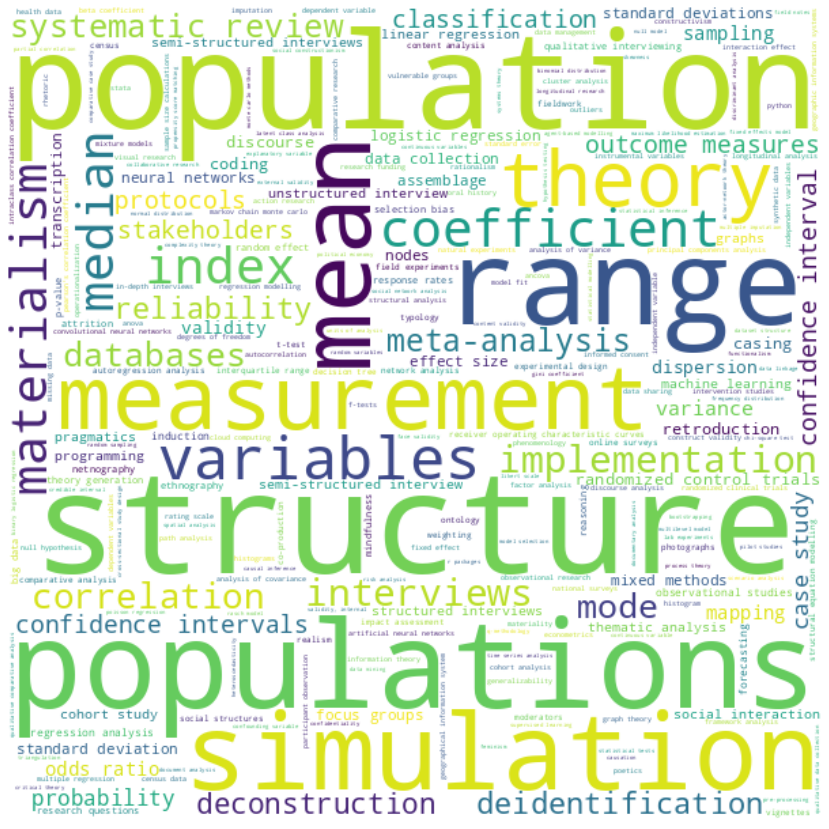

In [213]:
makeImage(getFrequencyDictForText(methods), seed = 1)

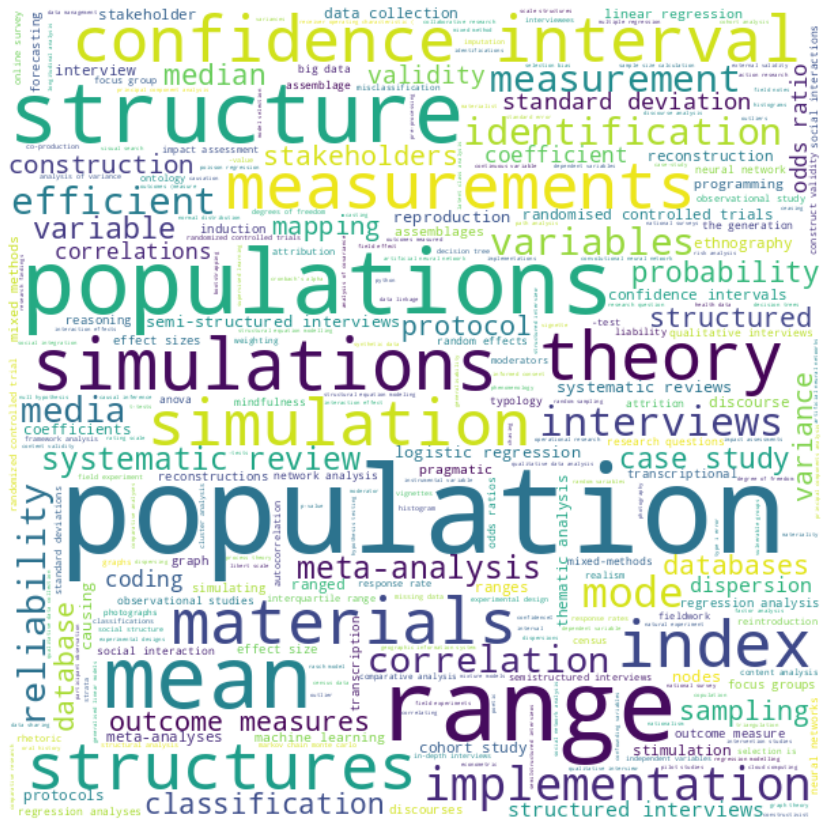

In [214]:
makeImage(getFrequencyDictForText(tokens), seed = 1)